#📌 Extracción

In [2]:
import pandas as pd
url='TelecomX_Data.json'
df = pd.read_json(url)
df.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [3]:
df.shape

(7267, 6)

#🔧 Transformación

In [4]:
#Normalizando los datos; 'customer','phone','internet', 'account'
# Expandir cada columna anidada
customer_df = pd.json_normalize(df['customer'])
phone_df = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df = pd.json_normalize(df['account'])

# Concatenar todo
df_flat = pd.concat([df.drop(['customer', 'phone', 'internet', 'account'], axis=1),
                     customer_df, phone_df, internet_df, account_df], axis=1)

df_flat.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [5]:
df.shape

(7267, 6)

In [6]:
df_flat.shape

(7267, 21)

In [7]:
#aplicar pd.unique
pd.unique(df['customerID']).shape

(7267,)

In [8]:
df_flat.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [9]:
#convertir tablas a boolean
#df_flat['SeniorCitizen'] = df_flat['SeniorCitizen'].astype(bool)
#df_flat['Partner'] = df_flat['Partner'].astype(bool)
#df_flat['Dependents'] = df_flat['Dependents'].astype(bool)
#df_flat['PhoneService'] = df_flat['PhoneService'].astype(bool)
#df_flat['MultipleLines'] = df_flat['MultipleLines'].astype(bool)
df_flat['InternetService'] = df_flat['InternetService'].astype('category')
df_flat['OnlineSecurity'] = df_flat['OnlineSecurity'].astype('category')
df_flat['OnlineBackup'] = df_flat['OnlineBackup'].astype('category')
df_flat['StreamingTV'] = df_flat['StreamingTV'].astype('category')
df_flat['PaymentMethod'] = df_flat['PaymentMethod'].astype('category')


In [10]:
df_flat.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7267 non-null   object  
 1   Churn             7267 non-null   object  
 2   gender            7267 non-null   object  
 3   SeniorCitizen     7267 non-null   int64   
 4   Partner           7267 non-null   object  
 5   Dependents        7267 non-null   object  
 6   tenure            7267 non-null   int64   
 7   PhoneService      7267 non-null   object  
 8   MultipleLines     7267 non-null   object  
 9   InternetService   7267 non-null   category
 10  OnlineSecurity    7267 non-null   category
 11  OnlineBackup      7267 non-null   category
 12  DeviceProtection  7267 non-null   object  
 13  TechSupport       7267 non-null   object  
 14  StreamingTV       7267 non-null   category
 15  StreamingMovies   7267 non-null   object  
 16  Contract          7267 n

In [11]:
df_flat['Charges.Total'] = pd.to_numeric(df_flat['Charges.Total'], errors='coerce') 
df_flat.dropna(subset=['Charges.Total'], inplace=True)  # Eliminar filas con valores NaN en 'Charges.Total'

#📊 Carga y análisis

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Churn', ylabel='count'>

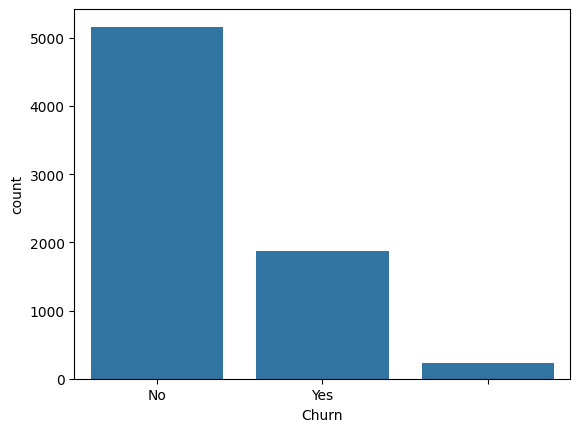

In [13]:
sns.countplot(data=df_flat, x='Churn')

In [14]:
df_flat.dropna(subset=['Churn'], inplace=True)  # Eliminar filas con valores NaN en 'Churn'

<Axes: xlabel='Churn', ylabel='count'>

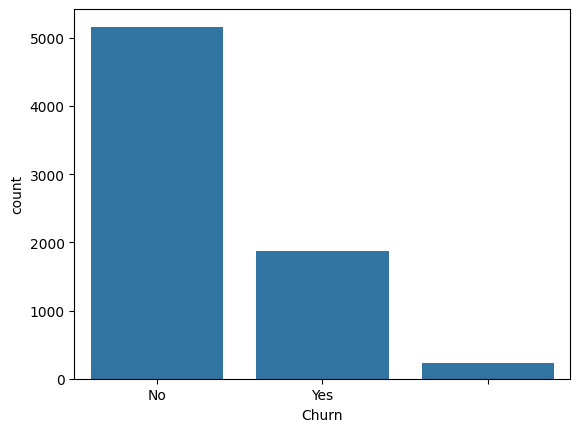

In [15]:
sns.countplot(data=df_flat, x='Churn')

In [16]:
df = df_flat.copy()

In [17]:
df['Churn'].unique()

array(['No', 'Yes', ''], dtype=object)

In [18]:
df.shape

(7256, 21)

In [19]:
#Dropear filas vacias, no NaN ""
df = df[df['Churn'] != '']
df.shape


(7032, 21)

<Axes: xlabel='Churn', ylabel='count'>

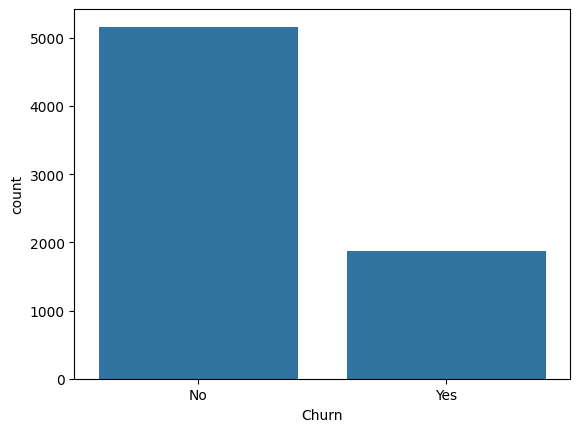

In [20]:
sns.countplot(data=df, x='Churn')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7032 non-null   object  
 1   Churn             7032 non-null   object  
 2   gender            7032 non-null   object  
 3   SeniorCitizen     7032 non-null   int64   
 4   Partner           7032 non-null   object  
 5   Dependents        7032 non-null   object  
 6   tenure            7032 non-null   int64   
 7   PhoneService      7032 non-null   object  
 8   MultipleLines     7032 non-null   object  
 9   InternetService   7032 non-null   category
 10  OnlineSecurity    7032 non-null   category
 11  OnlineBackup      7032 non-null   category
 12  DeviceProtection  7032 non-null   object  
 13  TechSupport       7032 non-null   object  
 14  StreamingTV       7032 non-null   category
 15  StreamingMovies   7032 non-null   object  
 16  Contract          7032 non-nu

In [22]:
df['Churn'].value_counts(normalize=True)

Churn
No     0.734215
Yes    0.265785
Name: proportion, dtype: float64

In [23]:
for col in ['Contract', 'InternetService', 'PaymentMethod', 'SeniorCitizen', 'Partner', 'Dependents']:
    print(f"\n{col} vs Churn")
    print(pd.crosstab(df[col], df['Churn'], normalize='index'))


Contract vs Churn
Churn                 No       Yes
Contract                          
Month-to-month  0.572903  0.427097
One year        0.887228  0.112772
Two year        0.971513  0.028487

InternetService vs Churn
Churn                  No       Yes
InternetService                    
DSL              0.810017  0.189983
Fiber optic      0.581072  0.418928
No               0.925658  0.074342

PaymentMethod vs Churn
Churn                            No       Yes
PaymentMethod                                
Bank transfer (automatic)  0.832685  0.167315
Credit card (automatic)    0.847469  0.152531
Electronic check           0.547146  0.452854
Mailed check               0.807980  0.192020

SeniorCitizen vs Churn
Churn                No       Yes
SeniorCitizen                    
0              0.763497  0.236503
1              0.583187  0.416813

Partner vs Churn
Churn          No       Yes
Partner                    
No       0.670239  0.329761
Yes      0.802829  0.197171

Dependent

#📄Informe final

El primer cambio notorio que veo que es que los clientes que contratan planes con pagos mensuales se pierden, no puedo considerarlo como un factor clave ya que podria deverse a un cambio reciente aun que tambien es sierto que los pagos a meses podrian salir menos convenientes y habria que revisar eso.

Por otro lado algo que si es notorio es que los clientes con fibra optica se pierden, esto si es un factor clave ya que la fibra optica es un servicio y puede que no cumpla con la espectativa o que sea muy caro.

Otro factor clave es el tipo de pago, los clientes con pagos domiciliados se conservan mejor que los demas, pero los que usan la plataforma virtual se pierden, es muy posible que haya un fallo en la plataforma o que no sea tan accesible para el usuario final y esto se refuerza al ver que los mayores de edad son los que mas se pierden, es posible que no sepan usar la plataforma o que no tengan acceso a ella.

Finalmente el echo de estar soltero tambien parece tener un impacto muy ligero en la perdida de clientes, pero no es un factor clave ya que no se puede considerar


Parac comprobar se crea un filtro considerando los parametros previamente mencionados

In [28]:
filtro_riesgo = (
    (df['Contract'] == 'Month-to-month') &
    (df['PaymentMethod'] == 'Electronic check') &
    (df['InternetService'] == 'Fiber optic')
)

df_riesgo = df[filtro_riesgo]
df_riesgo

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
12,0018-NYROU,No,Female,0,Yes,No,5,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,68.95,351.50
17,0021-IKXGC,No,Female,1,No,No,1,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,72.10,72.10
21,0023-XUOPT,Yes,Female,0,Yes,No,13,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,No,Month-to-month,No,Electronic check,94.10,1215.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7235,9948-YPTDG,Yes,Male,0,Yes,No,38,Yes,No,Fiber optic,...,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,79.45,3013.05
7240,9957-YODKZ,No,Male,1,Yes,No,6,Yes,Yes,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,80.80,457.10
7246,9965-YOKZB,Yes,Male,1,No,No,9,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,83.85,790.15
7251,9971-ZWPBF,No,Male,1,Yes,Yes,34,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,108.90,3625.20


Este filtro es de nuevo graficado y nos muestra como efectivamente la proporcion de clientes que se han perdido ha aumentado significativamente por lo que se consideraria priorizar la atencion a los clientes con potencial riesgo de perdida de negocio para asi poder mantener la relacion con ellos y evitar que se pierda el negocio.

In [33]:
df_riesgo['Churn'].value_counts(normalize=True)

Churn
Yes    0.603673
No     0.396327
Name: proportion, dtype: float64

<Axes: xlabel='Churn', ylabel='count'>

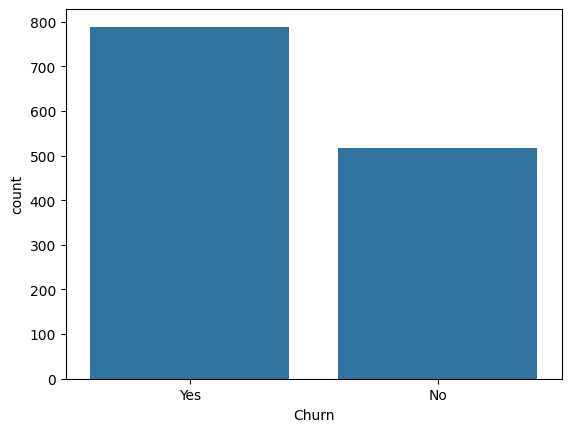

In [29]:
sns.countplot(data=df_riesgo, x='Churn')

In [35]:
pd.crosstab(df_riesgo['PaymentMethod'], df_riesgo['Churn'])

Churn,No,Yes
PaymentMethod,,
Electronic check,518,789


In [36]:
pd.crosstab(df['PaymentMethod'], df['Churn'])

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1284,258
Credit card (automatic),1289,232
Electronic check,1294,1071
Mailed check,1296,308
